In [17]:
import pandas as pd 
import numpy as np
pathX = "/home/ahmed/Downloads/machineLearning/AML_A1_Fall2020/dataX.csv"
pathY = "/home/ahmed/Downloads/machineLearning/AML_A1_Fall2020/dataY.csv"
dataX = pd.read_csv(pathX) 
dataY = pd.read_csv(pathY) 
# dataY.head()
def normalize(data):
    minX = min(data)
    maxX = max(data)
    for ind in data.index:
        result = (data[ind] - minX)/(maxX-minX)
        data.loc[ind] = result
normalize(dataX['Living Area'])
normalize(dataX['No of Bedrooms'])
normalize(dataY['Prices'])
dataX = pd.concat([pd.Series(1, index=dataX.index, name='00'), dataX], axis=1)
dataX.head(10)

,00,Living Area,No of Bedrooms
0,1,0.345284,0.50
1,1,0.206288,0.50
2,1,0.426917,0.50
3,1,0.155543,0.25
4,1,0.592388,0.75
5,1,0.312466,0.75
6,1,0.188086,0.50
7,1,0.158577,0.50
8,1,0.145615,0.50
9,1,0.177055,0.50


In [18]:
def hypothesis(theta, X):
#     print(theta*X)
    return theta*X

In [24]:
import csv
import os
import numpy as np
with open("/home/ahmed/Desktop/chinease/DataX.csv", 'r') as f:
    x = list(csv.reader(f, delimiter=","))
x = np.array(x[0:],dtype=np.float)
f.close();
with open("/home/ahmed/Desktop/chinease/DataY.csv", 'r') as f:
    y = list(csv.reader(f, delimiter=","))
y = np.array(y[0:],dtype=np.float)
f.close()
def eliminate(r1, r2, col, target=0):
    fac = (r2[col]-target) / r1[col]
    for i in range(len(r2)):
        r2[i] -= fac * r1[i]

def gauss(a):
    for i in range(len(a)):
        if a[i][i] == 0:
            for j in range(i+1, len(a)):
                if a[i][j] != 0:
                    a[i], a[j] = a[j], a[i]
                    break
            else:
                print("MATRIX NOT INVERTIBLE")
                return -1
        for j in range(i+1, len(a)):
            eliminate(a[i], a[j], i)
    for i in range(len(a)-1, -1, -1):
        for j in range(i-1, -1, -1):
            eliminate(a[i], a[j], i)
    for i in range(len(a)):
        eliminate(a[i], a[i], i, target=1)
    return a

def inverse(a):
    tmp = [[] for _ in a]
    for i,row in enumerate(a):
        assert len(row) == len(a)
        tmp[i].extend(row + [0]*i + [1] + [0]*(len(a)-i-1))
    gauss(tmp)
    ret = []
    for i in range(len(tmp)):
        ret.append(tmp[i][len(tmp[i])//2:])
    return ret
lst = x.tolist()
for i in range(47):
    lst[i].insert(0,1)
arr = np.array(lst)
transpose = [[0]*47]*3
inv = [[0]*3]*3
transpose = [[arr[j][i] for j in range(len(arr))] for i in range(len(arr[0]))]
multiply1 = np.matmul(transpose,arr)
multiply2 = np.matmul(transpose,y)
lst2 = multiply1.tolist()
inv = inverse(lst2)
arr1=np.array(inv)
result = np.matmul(arr1,multiply2)
print(result)

[[89802.89126616]
 [  138.97279961]
 [-8640.30461447]]


In [21]:
l = []
for i in result:
    l.append(i[0])
print(l)
y_hat = hypothesis(l, dataX)
y_hat = np.sum(y_hat, axis=1)

[89802.8912661625, 138.97279961177128, -8640.304614474531]


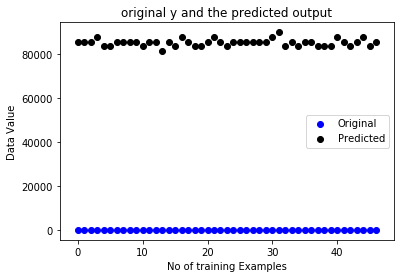

NameError: name 'J' is not defined

<Figure size 432x288 with 0 Axes>

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 47)),y= dataY, color='blue', label='Original')         
plt.scatter(x=list(range(0, 47)), y=y_hat, color='black', label='Predicted')
plt.title('original y and the predicted output')
plt.xlabel("No of training Examples")
plt.ylabel("Data Value")
plt.legend()
plt.show()
